# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
from scipy.ndimage import convolve
%matplotlib inline

### Reading the Mosaic Image

In [2]:
def read_image(IMG_NAME):
    img = plt.imread(IMG_NAME)
    return img

In [3]:
IMG_DIR = 'images/'
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image(IMG_DIR+IMG_NAME)# YOUR CODE HERE

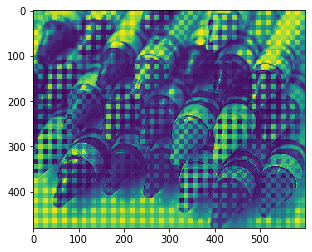

In [4]:
# For a sanity check, display your image here
plt.imshow(mosaic_img)

### Linear Interpolation

In [5]:
### HINT : You might want to use filters

In [6]:
### HINT : To use filters you might want to write your kernels

In [7]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

red_blue_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]])/4

green_filter = np.array([[0, 1, 0],
                        [1, 4, 1],
                        [0, 1, 0]])/4

In [8]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [9]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))    
    ### YOUR CODE HERE ###
    
    #seperating different color channel pixels in mosaic using bayer mosaic pattern  
    
    R_channel = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    G_channel = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    B_channel = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    
    R_channel[::2, ::2] = 1
    G_channel[::2, 1::2] = 1
    G_channel[1::2, ::2] = 1
    B_channel[1::2, 1::2] = 1

    
    R_channel = mosaic_img * R_channel
    G_channel = mosaic_img * G_channel
    B_channel = mosaic_img * B_channel
    
    soln_image[:,:,0] = convolve(R_channel, red_blue_filter)
    soln_image[:,:,1] = convolve(G_channel, green_filter)
    soln_image[:,:,2] = convolve(B_channel, red_blue_filter)

    soln_image = np.clip(soln_image, 0, 255).astype(np.uint8) 
    
    return soln_image

In [10]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    img_shape = np.shape(soln_image)
    error_map = np.zeros((img_shape[0], img_shape[1]))
    
    max_err = 0.0
    total_err = 0.0
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            for k in range(img_shape[2]):
                error_map[i, j] += (float(original_image[i, j, k]) - float(soln_image[i, j, k]))**2
                
                diff = soln_image[i, j, k] - original_image[i, j, k]
                total_err += diff*diff
                if np.abs(diff) > max_err:
                    max_err = np.abs(diff)

    pp_err = total_err/(img_shape[0]*img_shape[1]*img_shape[2])
    plt.imshow(np.sqrt(error_map)/3)
    
    return pp_err, max_err

In [11]:
def create_error_map(soln_image, original_image):
    img_shape = np.shape(original_image)
    error_map = np.zeros((img_shape[0], img_shape[1]))
    
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            for k in range(img_shape[2]):
                error_map[i, j] += (float(original_image[i, j, k]) - float(soln_image[i, j, k]))**2
    plt.figure()            
    plt.imshow(np.sqrt(error_map)/3)
    
    return error_map

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

Text(0.5, 1.0, 'Solution Image')

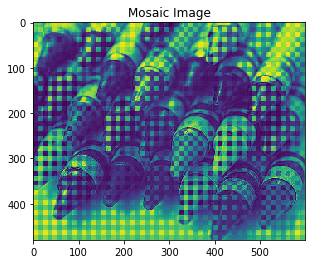

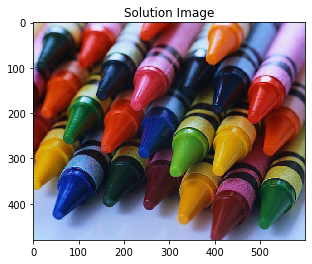

In [12]:
mosaic_img = read_image('images/crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('images/crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE

plt.imshow(mosaic_img)
plt.title("Mosaic Image")
plt.figure()
plt.imshow(soln_image)
plt.title("Solution Image")

C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


The average per-pixel error for crayons is: 16.684626157407408
The maximum per-pixel error for crayons is: 255


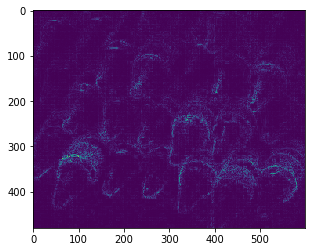

In [13]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

Text(0.5, 1.0, 'Solution Image')

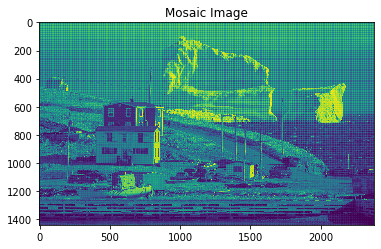

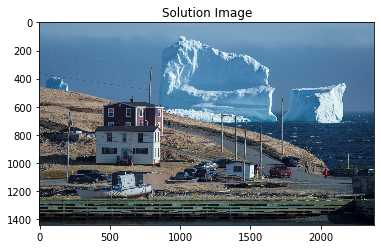

In [14]:
mosaic_img = read_image(IMG_DIR+'iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE

plt.imshow(mosaic_img)
plt.title("Mosaic Image")
plt.figure()
plt.imshow(soln_image)
plt.title("Solution Image")

C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


The average per-pixel error for iceberg is: 14.865647739994403
The maximum per-pixel error for iceberg is: 255


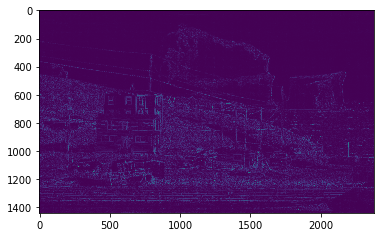

In [15]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

Text(0.5, 1.0, 'Solution Image')

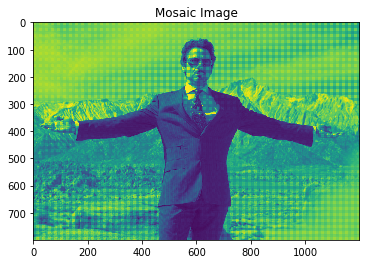

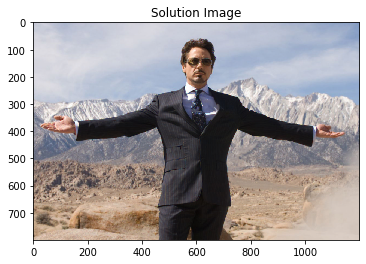

In [16]:
mosaic_img = read_image(IMG_DIR+'tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE

plt.imshow(mosaic_img)
plt.title("Mosaic Image")
plt.figure()
plt.imshow(soln_image)
plt.title("Solution Image")

C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


The average per-pixel error for tony is: 5.4070784722222225
The maximum per-pixel error for tony is: 255


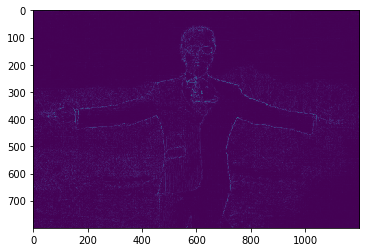

In [17]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

<Figure size 432x288 with 0 Axes>

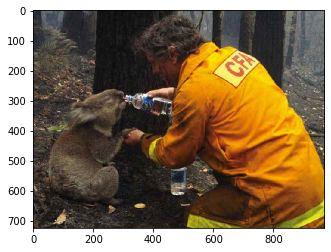

<Figure size 432x288 with 0 Axes>

In [18]:
mosaic_img = read_image(IMG_DIR+'hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 

plt.imshow(soln_image)
plt.figure()

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [19]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    
    img_shape = np.shape(mosaic_img)
    interpolated_image = get_solution_image(mosaic_img)
    
    R = interpolated_image[:,:,0]
    G = interpolated_image[:,:,1]
    B = interpolated_image[:,:,2]
    
    R = G + scipy.signal.medfilt2d(R - G)
    B = G + scipy.signal.medfilt2d(B - G)
    
    freeman_soln_image = np.zeros((img_shape[0], img_shape[1], 3))
    freeman_soln_image[:,:,0] = R
    freeman_soln_image[:,:,1] = G
    freeman_soln_image[:,:,2] = B
    
    freeman_soln_image = np.clip(freeman_soln_image, 0, 255).astype(np.uint8)
    
    return freeman_soln_image

Text(0.5, 1.0, 'Solution Image')

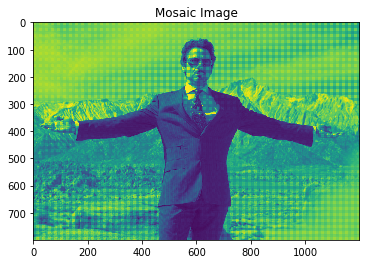

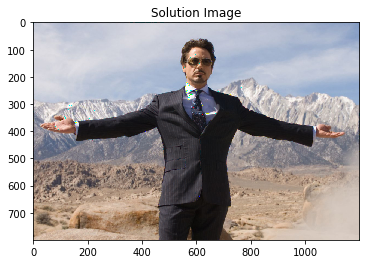

In [20]:
mosaic_img = read_image('images/tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('images/tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.figure()
plt.imshow(mosaic_img)
plt.title("Mosaic Image")
plt.figure()
plt.imshow(soln_image)
plt.title("Solution Image")

C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars


The average per-pixel error for tony is: 5.247274652777778
The maximum per-pixel error for tony is: 255


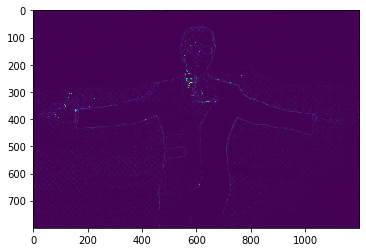

In [21]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

Text(0.5, 1.0, 'Solution Image')

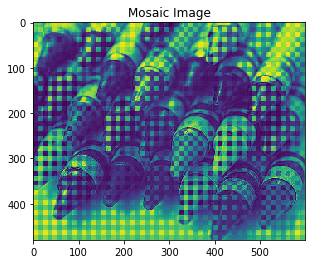

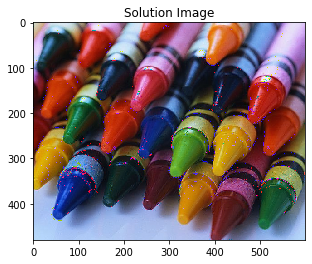

In [22]:
### Feel free to play around with other images for Freeman's method above ###

mosaic_img = read_image('images/crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('images/crayons.jpg')

plt.imshow(mosaic_img)
plt.title("Mosaic Image")
plt.figure()
plt.imshow(soln_image)
plt.title("Solution Image")

C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars


The average per-pixel error for crayons is: 17.23139814814815
The maximum per-pixel error for crayons is: 255


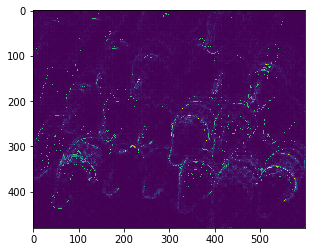

In [23]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

Text(0.5, 1.0, 'Solution Image')

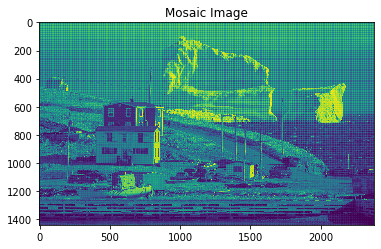

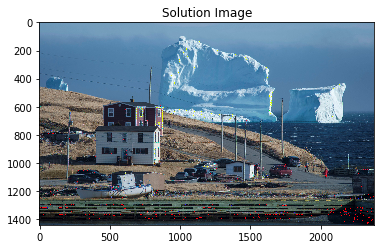

In [24]:
mosaic_img = read_image(IMG_DIR+'iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'iceberg.jpg')

plt.imshow(mosaic_img)
plt.title("Mosaic Image")
plt.figure()
plt.imshow(soln_image)
plt.title("Solution Image")

C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars


The average per-pixel error for iceberg is: 15.558857713717076
The maximum per-pixel error for iceberg is: 255


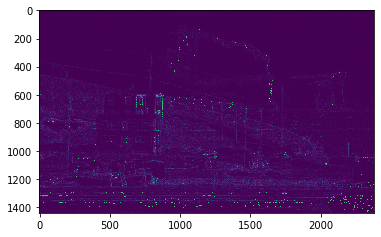

In [25]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

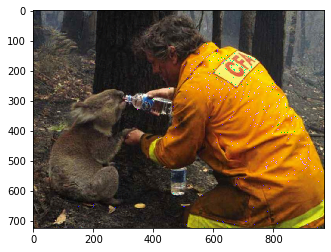

In [26]:
mosaic_img = read_image(IMG_DIR+'hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it

plt.imshow(soln_image)

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [27]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    
    img_shape = np.shape(original_image)
    mosaic_img = np.zeros((img_shape[0], img_shape[1]))
    
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            if i%2 == 0 :
                if j%2 == 0:
                    #Red pixels
                    mosaic_img[i, j] = original_image[i, j, 0]
                else:
                    #Green pixels
                    mosaic_img[i, j] = original_image[i, j, 1]
            elif j%2 == 0:
                    #Green pixels
                    mosaic_img[i, j] = original_image[i, j, 1]
            else:
                #Blue pixels
                mosaic_img[i, j] = original_image[i, j, 2]
            
    
    return mosaic_img

Text(0.5, 1.0, 'Mosaiced Image')

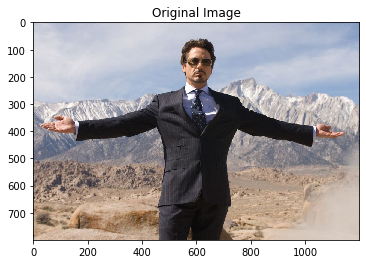

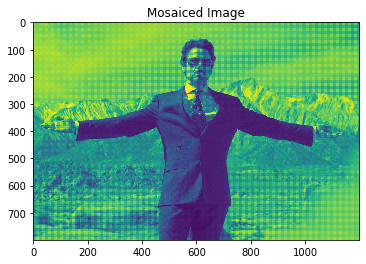

In [28]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function
original_image = read_image(IMG_DIR + 'tony.jpg')
mosaic_image = get_mosaic_image(original_image)

plt.imshow(original_image)
plt.title("Original Image")
plt.figure()
plt.imshow(mosaic_image)
plt.title("Mosaiced Image")

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

Text(0.5, 1.0, 'Solution Image')

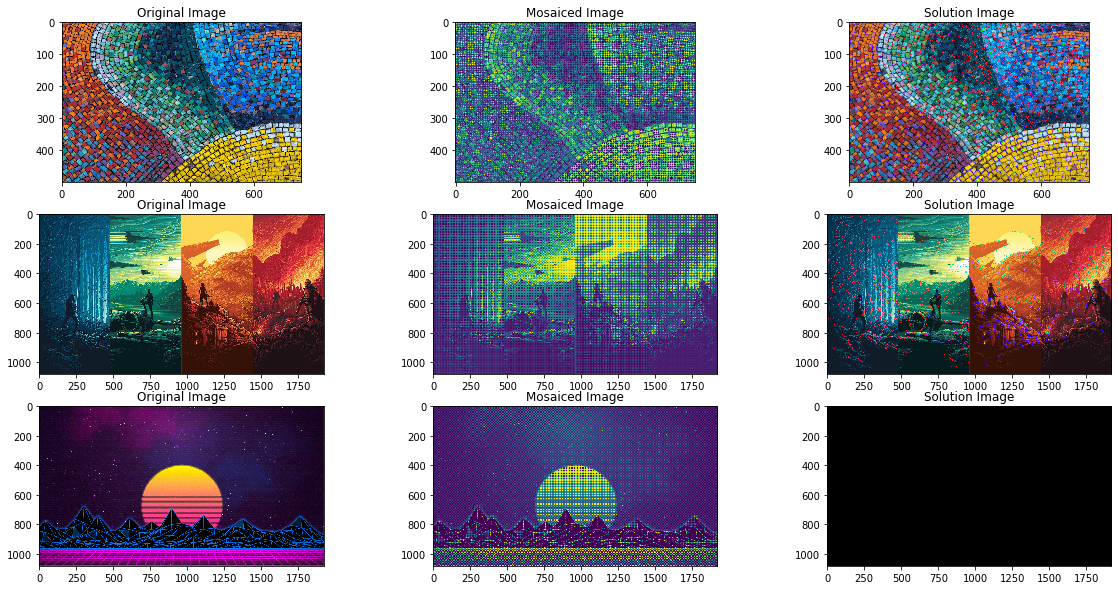

In [29]:
### YOUR CODE HERE ###
original_image_one = read_image(IMG_DIR + 'mosaic1.jpg')
mosaic_image = get_mosaic_image(original_image_one)
soln_img1 = get_freeman_solution_image(mosaic_image)

plt.figure(figsize=(20, 10))
plt.subplot(331)
plt.imshow(original_image_one)
plt.title("Original Image")
plt.subplot(332)
plt.imshow(mosaic_image)
plt.title("Mosaiced Image")
plt.subplot(333)
plt.imshow(soln_img1)
plt.title("Solution Image")

original_image_two = read_image(IMG_DIR + 'panels.jpg')
mosaic_image = get_mosaic_image(original_image_two)
soln_img2 = get_freeman_solution_image(mosaic_image)

plt.subplot(334)
plt.imshow(original_image_two)
plt.title("Original Image")
plt.subplot(335)
plt.imshow(mosaic_image)
plt.title("Mosaiced Image")
plt.subplot(336)
plt.imshow(soln_img2)
plt.title("Solution Image")

original_image = read_image(IMG_DIR + 'sunset.png')
mosaic_image = get_mosaic_image(original_image)
soln_img = get_freeman_solution_image(mosaic_image)

plt.subplot(337)
plt.imshow(original_image)
plt.title("Original Image")
plt.subplot(338)
plt.imshow(mosaic_image)
plt.title("Mosaiced Image")
plt.subplot(339)
plt.imshow(soln_img)
plt.title("Solution Image")

C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Siddharth Garg\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ubyte_scalars


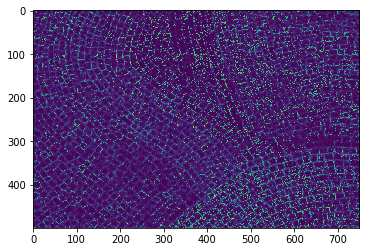

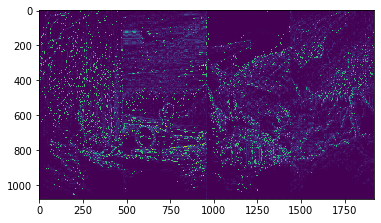

In [32]:
pp_err, max_err = compute_errors(soln_img1, original_image_one)
plt.figure()
pp_err, max_err = compute_errors(soln_img2, original_image_two)

In [31]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####